In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def planck_law(lamda, T, h, c, k):
    lamda = np.maximum(lamda, 1e-12)
    term1 = (2 * h * c**2) / lamda**5
    expo = (h * c) / (lamda * k * T)
    expo = np.clip(expo, -100, 100)
    term2 = 1 / (np.exp(expo) - 1)
    return term1 * term2

In [28]:
def load_data(filename):
    try:
        data = np.loadtxt(filename, delimiter=",")
        if data.shape[1] != 2:
            raise ValueError("File must contain exactly two columns: wavelength and radiance.")
        return data[:, 0], data[:, 1]
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        raise
    except ValueError as err:
        print(f"Error: {err}")
        raise
    except Exception as err:
        print(f"An unexpected error occurred: {err}")
        raise

In [29]:
# Curve fitting to estimate parameters T, h, c, k
def main_func(wavelength, T, h, c, k):
    return planck_law(wavelength, T, h, c, k)

In [30]:
# Fit T with known constants h, c, k
def simpler_func(wavelength, T, k):
    h = 6.63e-34
    c = 3e8
    return planck_law(wavelength, T, h, c, k)

In [34]:
initial_guesses = [3000, 6.63e-34, 3.0e8, 1.38e-23]  # Example values for T, h, c, k
initial_guess_simpler = [3000, 1.38e-23]  # Initial guess for simpler function with one unknown value
files = ["./ass3-data/d1.txt", "./ass3-data/d2.txt", "./ass3-data/d3.txt", "./ass3-data/d4.txt"]

In [35]:
# Plot the fit
def plot_fit(wavelengths, radiance):
    plt.figure()
    plt.scatter(wavelengths, radiance, label='Data', color='blue')
    plt.plot(wavelengths, main_func(wavelengths, *params), 'r--', label='Fitted curve')
    plt.plot(wavelengths, simpler_func(wavelengths, *params_simpler), 'g-', label='Simplified curve')
    plt.xlabel('Wavelength (m)')
    plt.ylabel('Spectral Radiance')
    plt.legend()
    plt.title(f"Fit Results for {files}")
    plt.show()

Results for file './ass3-data/d1.txt':
Estimated parameters: T = 3111.980241652403, h = 6.026012889526384e-34, c = 310122086.568425, k = 1.687000810528568e-23
Estimated parameters - simpler function: T = 3236.082880412515, k = 1.7165320299667216e-23


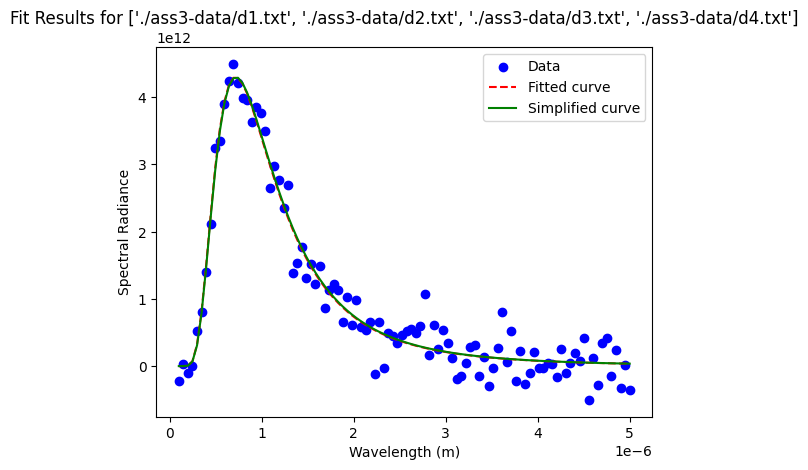

Results for file './ass3-data/d2.txt':
Estimated parameters: T = 3022.7638316011903, h = 5.147035244800483e-34, c = 273627482.2120922, k = 1.3956381309252542e-23
Estimated parameters - simpler function: T = 2419.971600298323, k = 2.259359167376444e-23


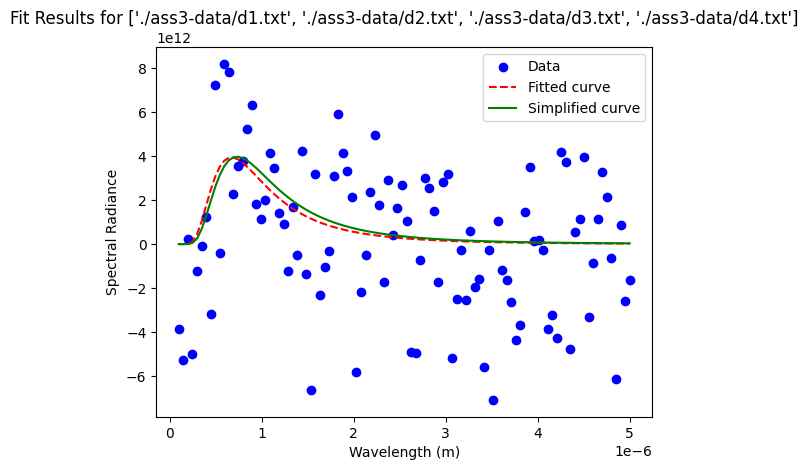

Results for file './ass3-data/d3.txt':
Estimated parameters: T = 3627.1664048835173, h = 7.217784102144947e-34, c = 279824524.9064473, k = 1.5647019266510402e-23
Estimated parameters - simpler function: T = 3907.3886973616295, k = 1.4148014364136728e-23


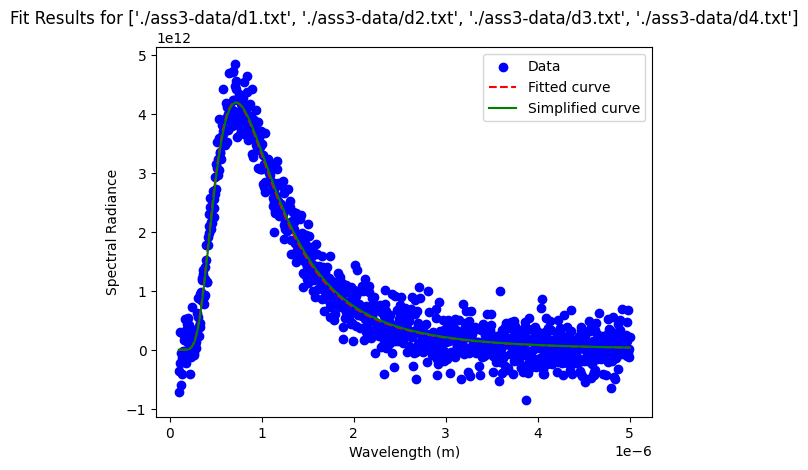

Results for file './ass3-data/d4.txt':
Estimated parameters: T = 3259.509635202815, h = 6.0774464652963875e-34, c = 304448472.50496936, k = 1.5580712071807177e-23
Estimated parameters - simpler function: T = 3103.959629229098, k = 1.7382992635824354e-23


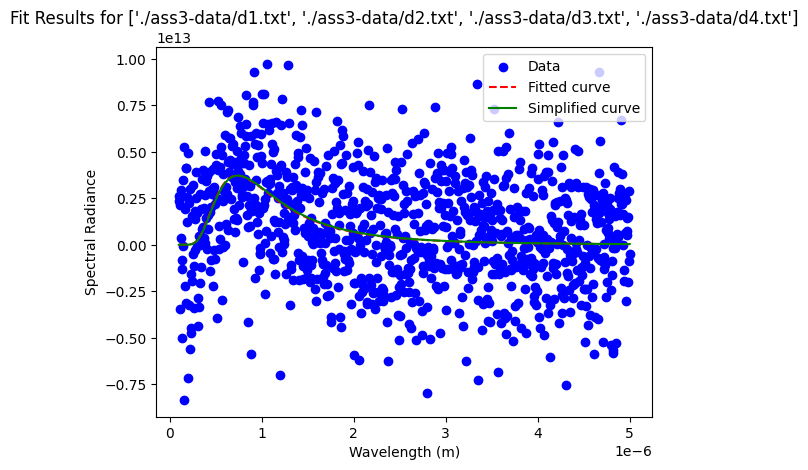

In [36]:
for file in files:

    wavelengths, radiance = load_data(file) # Load the data (example: d1.txt)

    params, _ = curve_fit(main_func, wavelengths, radiance, p0=initial_guesses)
    T_est, h_est, c_est, k_est = params # Fit all parameters (T, h, c, k)

    params_simpler, _ = curve_fit(simpler_func, wavelengths, radiance, p0=initial_guess_simpler)
    T_est_simplified, k_est_simplified = params_simpler

    print(f"Results for file '{file}':")
    print(f"Estimated parameters: T = {T_est}, h = {h_est}, c = {c_est}, k = {k_est}")
    print(f"Estimated parameters - simpler function: T = {T_est_simplified}, k = {k_est_simplified}")

    # Plot the data and the fit
    plot_fit(wavelengths, radiance)
